## Sales analysis with python

#### Import necessary libraries

In [721]:
import pandas as pd
import os
from pathlib import Path
from datetime import datetime

#### Import and merge all csv files from a folder

In [618]:
path = '/Users/conykuo/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'

In [619]:
files = os.listdir(path)

In [620]:
df = pd.DataFrame()
for file in files:
    temp = pd.read_csv(path + file)
    df = pd.concat([df,temp],ignore_index=True)

#### Read data

In [622]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Cleaning

#### 1. Drop rows with string 'Order ID'. Because it concatenated entities in the df when combining files.

In [623]:
df = df.drop(df.loc[df['Order ID']=='Order ID'].index ,axis=0)

#### 2. Drop NaN rows

In [628]:
df[df['Quantity Ordered'].isnull()] #545 rows
df = df.dropna()

#### 3. Covert columns to correct types

In [635]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
df['Price Each'] = df['Price Each'].astype(float)

#### 4. Covert Order Date column as time format

In [641]:
df['Time'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y %H:%M')

#### 5. Create new columns: month, day, weekday and hour

In [648]:
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['weekday'] = df['Time'].dt.weekday
df['Hour'] = df['Time'].dt.hour

#### 6. Create other columns that we can use in data exploration later on: revenue, state and city

In [646]:
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']
df['state'] = df['Purchase Address'].str[-8:-6] #get last 6-7th character as state (ex: NY, CA)

#City:
#Split Purchase Address by comma and assign them to atemporary df called 'city'. 
#Assign index[1] of city (which is city itself) to origin df as a new column.
city = df['Purchase Address'].str.split(',',expand = True) 
df['city'] = city[1]

#### Now we're all set with the organized data!

In [645]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,Time,Month,Day,weekday,Hour,state,city
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,2019-12-30 00:01:00,12,30,0,0,NY,New York City
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,2019-12-29 07:03:00,12,29,6,7,NY,New York City
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,2019-12-12 18:21:00,12,12,3,18,NY,New York City
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,2019-12-22 15:13:00,12,22,6,15,CA,San Francisco
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,2019-12-18 12:38:00,12,18,2,12,GA,Atlanta


### Data Exploration time!

#### Question 1: What's the best month for sale? How much was earned that month?

#### It sells most in December. Sales are good in Q4 in general. 

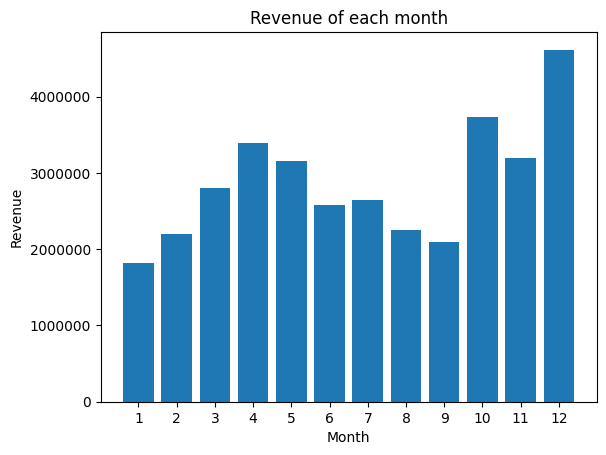

In [650]:
import matplotlib.pyplot as plt

revenue = df.groupby('Month')['Revenue'].sum() #revenue by month

month = range(1,13) #month 1-12 in order
plt.bar(month,revenue)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue of each month')
plt.ticklabel_format(style='plain') #prevent it from showing scientific notation 
plt.show()

#### Question 2: What's the best time for advertising? 

#### 12-13 at noon and 7-9 at night are 2 golden time of sales traffic, so I advice to advertise in these 2 periods to maxmaize the impact.

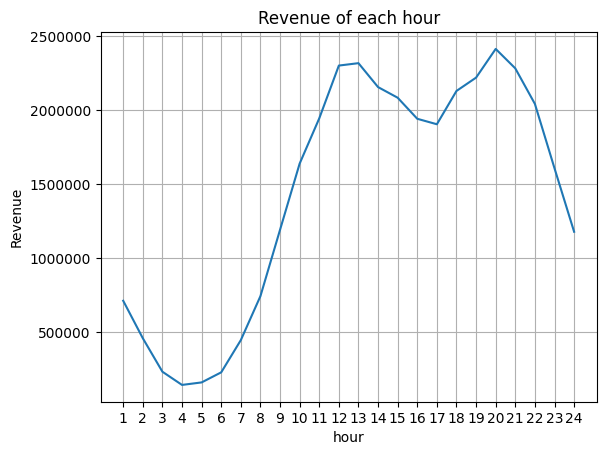

In [664]:
hour_revenue = df.groupby('Hour')['Revenue'].sum() #revenue by hour

hour = range(1,25) #hour 1-24 in order

plt.plot(hour,hour_revenue)
plt.xticks(hour) 
plt.xlabel('hour')
plt.ylabel('Revenue')
plt.title('Revenue of each hour')
plt.ticklabel_format(useOffset=False)
plt.grid()
plt.ticklabel_format(style='plain') #prevent it from showing scientific notation 
plt.show()

#### Question 3: What state/city had the highest sales number?

#### CA is the state with highest sales amount. 

state
CA    13714774.71
GA     2795498.58
MA     3661642.01
ME      449758.27
NY     4664317.43
OR     1870732.34
TX     4587557.15
WA     2747755.48
Name: Revenue, dtype: float64

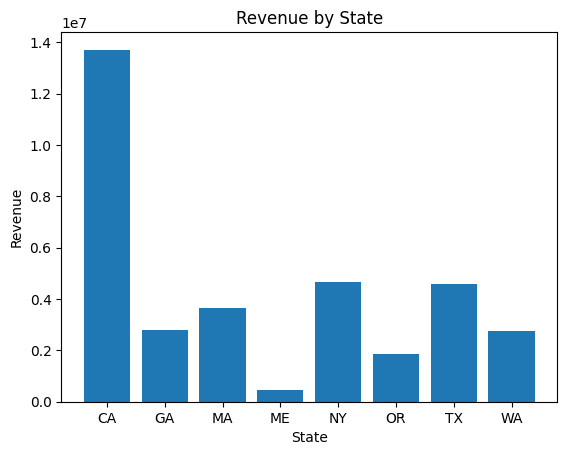

In [690]:
state_revenue = df.groupby('state')['Revenue'].sum()
state = [state for state, df in df.groupby('state')['Revenue']] #Get the order of state of state_revenue in order to match in barchart.
plt.bar(state,state_revenue)
plt.xlabel('State')
plt.ylabel('Revenue')
plt.title('Revenue by State')
state_revenue

#### San Francisco is the city with highest sales amount. 

city
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Revenue, dtype: float64

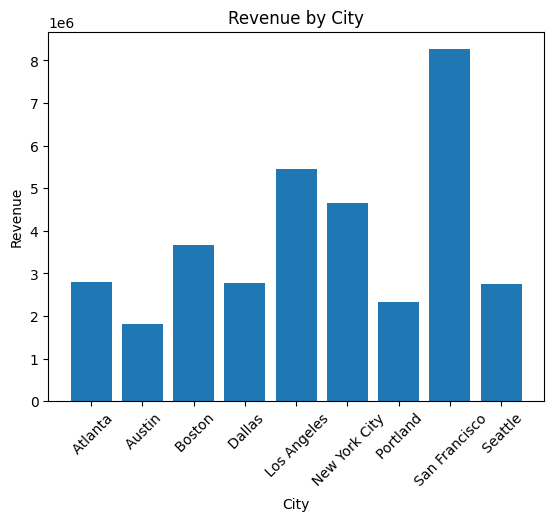

In [695]:
city_revenue = df.groupby('city')['Revenue'].sum()
city = [city for city,df in df.groupby('city')] #Get the order of city of city_revenue in order to match in barchart.
plt.bar(city,city_revenue)
plt.xlabel('City')
plt.ylabel('Revenue')
plt.title('Revenue by City')
plt.xticks(rotation = 45) #prevent labels from overlapping each other
city_revenue

#### Question 4: What products are most often sold together?

#### Most common purchase combination is iPhone and Lightning Charging Cable (1,005 orders). We may consider to do promotion on popular product sets to boost sales.

In [698]:
# data cleaning
df2 = df[df['Order ID'].duplicated(keep=False)] # get duplicated order-id rows because we want orders with multiple products.
df2['Product_set'] = df2.groupby('Order ID')['Product'].transform(lambda x: ",".join(x)) # combine all products per order to a string

df2 = df2[['Order ID','Product_set']].drop_duplicates() #drop duplicates and only leave desired columns

/var/folders/zy/hwc4hzfs5_9_z1t_f6_p_nww0000gn/T/ipykernel_5493/3798476535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Product_set'] = df2.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


In [702]:
from itertools import combinations
from collections import Counter

count = Counter()

for rows in df2['Product_set']:
    products = rows.split(',')
    count.update(Counter(combinations(products,2)))

for key,value in count.most_common(10): #top 10 most common combination
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most?

#### AAA Batteries (4-pack) is the best-seller product.

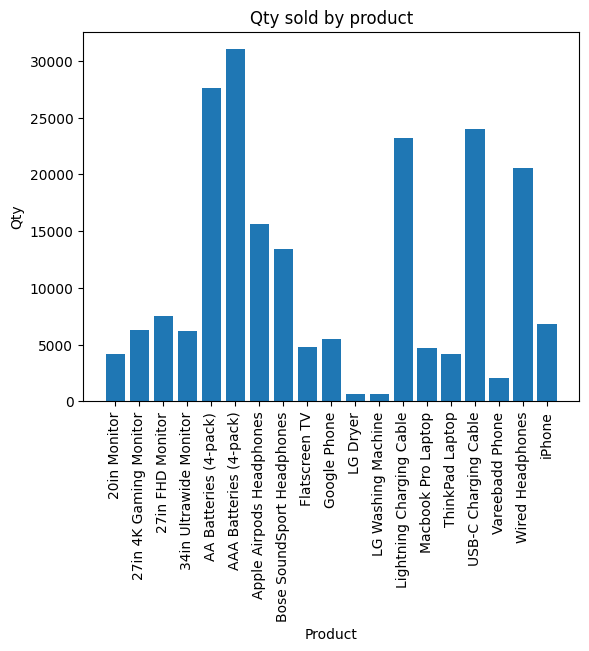

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [716]:
product = [product for product,df in product_group]
product_qty = product_group['Quantity Ordered'].sum()

plt.bar(product,product_qty)
plt.xticks(rotation=90)
plt.title('Qty sold by product')
plt.xlabel('Product')
plt.ylabel('Qty')
plt.show()
product_qty